In [8]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

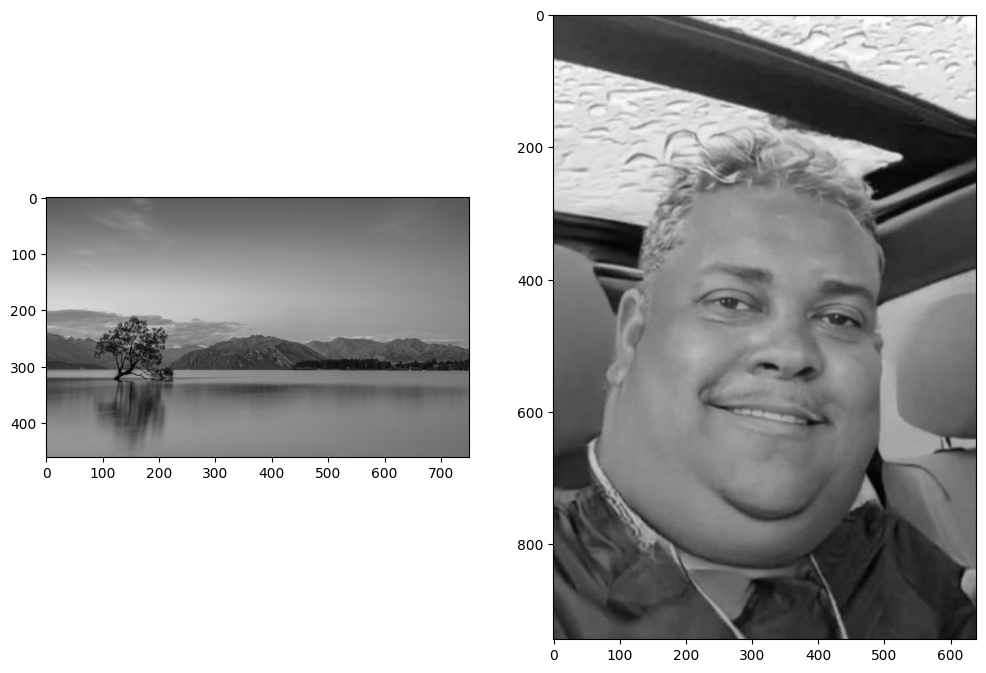

In [9]:
img_aluno1 = cv2.imread('images/img_aluno1.jpg', 0)
img_aluno2 = cv2.imread('images/img_aluno2.jpg', 0)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_aluno1, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_aluno2, cv2.COLOR_BGR2RGB))

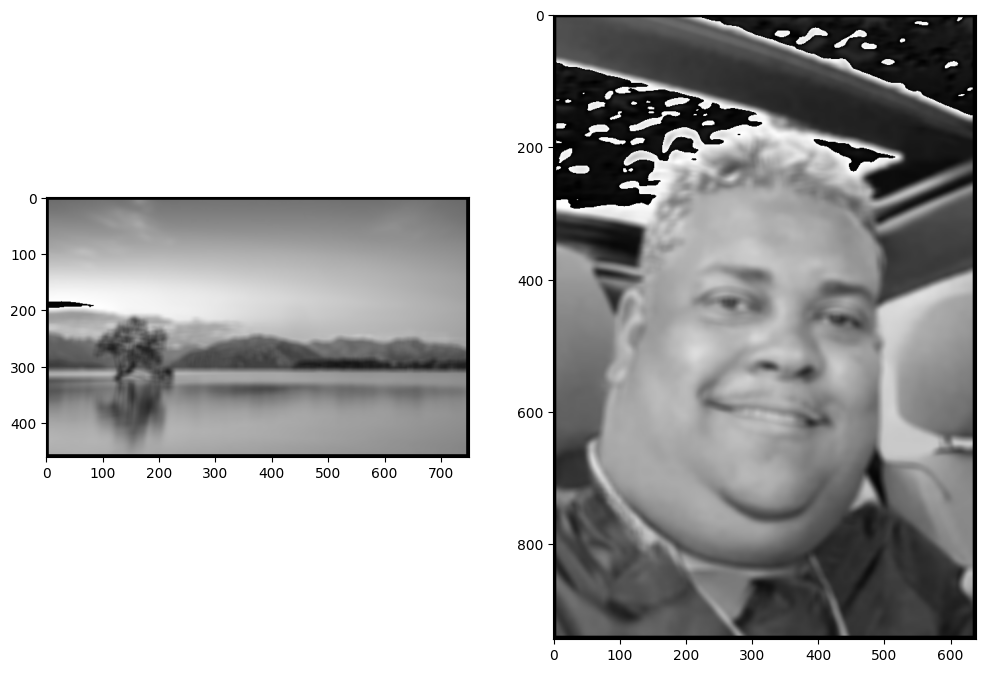

In [10]:
tamanho_kernel = 10
altura_img1, largura_img1 = img_aluno1.shape
kernel = np.ones((tamanho_kernel, tamanho_kernel), dtype=np.float32) / (tamanho_kernel**2)
img1_suavizada = np.zeros((altura_img1, largura_img1), dtype=np.uint8)

for y in range(tamanho_kernel//2, altura_img1 - tamanho_kernel//2):
    for x in range(tamanho_kernel//2, largura_img1 - tamanho_kernel//2):
        total = 0
        for i in range(-tamanho_kernel//2, tamanho_kernel//2 + 1):
            for j in range(-tamanho_kernel//2, tamanho_kernel//2 + 1):
                total += img_aluno1[y + i, x + j]
        img1_suavizada[y, x] = total // (tamanho_kernel**2)

altura_img2, largura_img2 = img_aluno2.shape
kernel = np.ones((tamanho_kernel, tamanho_kernel), dtype=np.float32) / (tamanho_kernel**2)
img2_suavizada = np.zeros((altura_img2, largura_img2), dtype=np.uint8)

for y in range(tamanho_kernel//2, altura_img2 - tamanho_kernel//2):
    for x in range(tamanho_kernel//2, largura_img2 - tamanho_kernel//2):
        total = 0
        for i in range(-tamanho_kernel//2, tamanho_kernel//2 + 1):
            for j in range(-tamanho_kernel//2, tamanho_kernel//2 + 1):
                total += img_aluno2[y + i, x + j]
        img2_suavizada[y, x] = total // (tamanho_kernel**2)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1_suavizada, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_suavizada, cv2.COLOR_BGR2RGB))

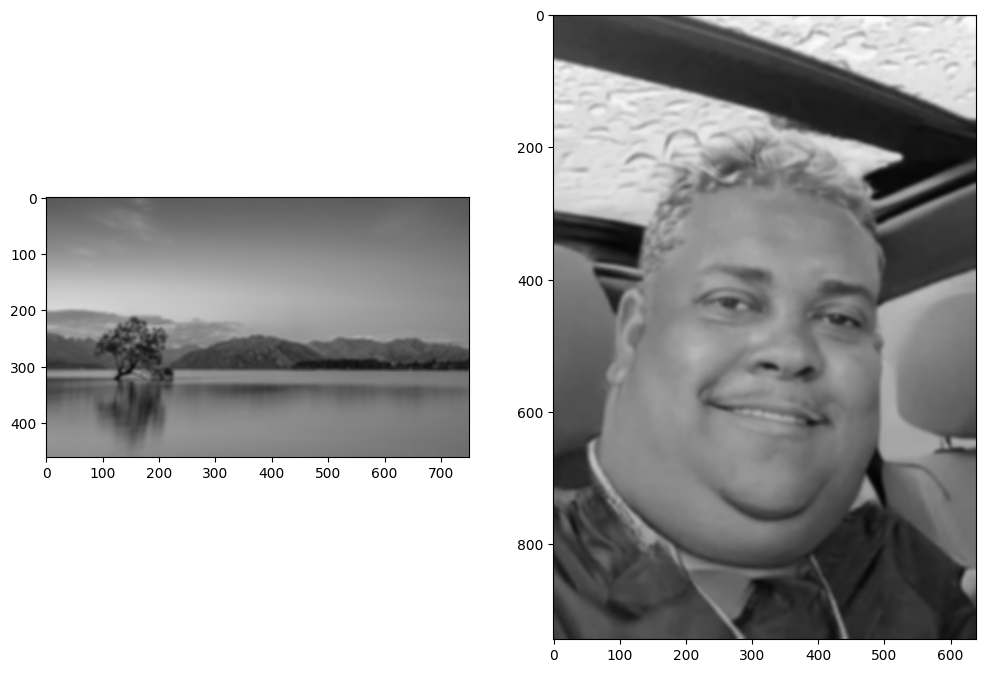

In [11]:
k = 3

altura_img1, largura_img1 = img_aluno1.shape
img1_suavizadaknn = np.zeros((altura_img1, largura_img1), dtype=np.uint8)

for y in range(altura_img1):
    for x in range(largura_img1):
        pixel_value = img_aluno1[y, x]
        neighbors = []
        
        for i in range(max(0, y - k), min(altura_img1, y + k + 1)):
            for j in range(max(0, x - k), min(largura_img1, x + k + 1)):
                neighbors.append(img_aluno1[i, j])
        
        mean_value = np.mean(neighbors)
        img1_suavizadaknn[y, x] = mean_value


altura_img2, largura_img2 = img_aluno2.shape
img2_suavizadaknn = np.zeros((altura_img2, largura_img2), dtype=np.uint8)

for y in range(altura_img2):
    for x in range(largura_img2):
        pixel_value = img_aluno2[y, x]
        neighbors = []
        
        for i in range(max(0, y - k), min(altura_img2, y + k + 1)):
            for j in range(max(0, x - k), min(largura_img2, x + k + 1)):
                neighbors.append(img_aluno2[i, j])
        
        mean_value = np.mean(neighbors)
        img2_suavizada[y, x] = mean_value

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1_suavizadaknn, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_suavizada, cv2.COLOR_BGR2RGB))

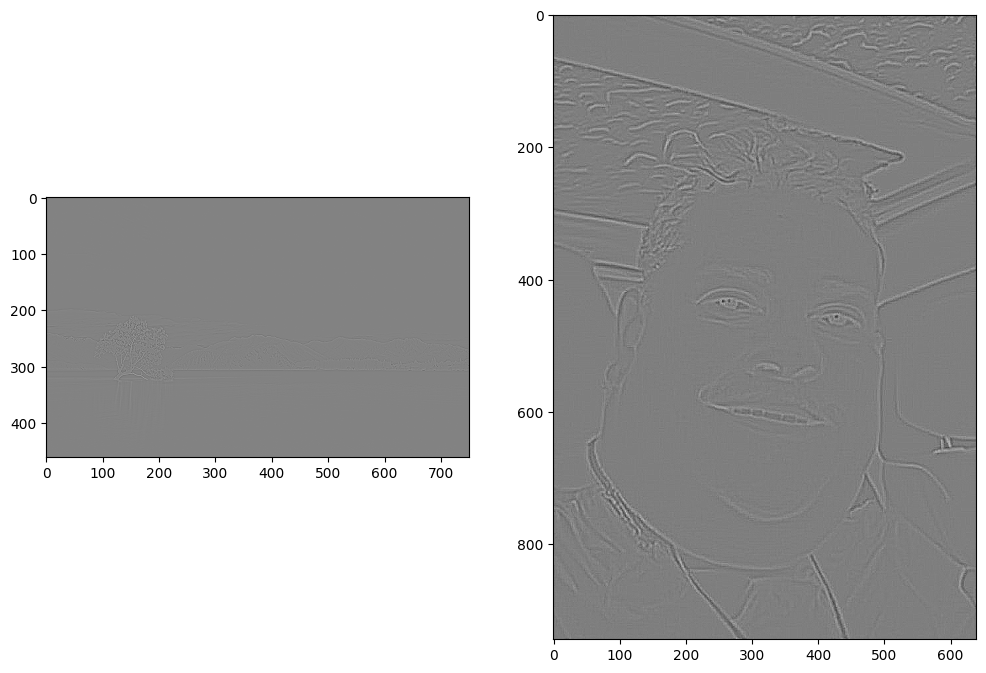

In [12]:
img_laplaciano_img1 = cv2.Laplacian(img_aluno1, cv2.CV_64F)
img_laplaciano_img2 = cv2.Laplacian(img_aluno2, cv2.CV_64F)

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.imshow(img_laplaciano_img1, cmap='gray')
plt.subplot(122)
plt.imshow(img_laplaciano_img2, cmap='gray')
plt.show()

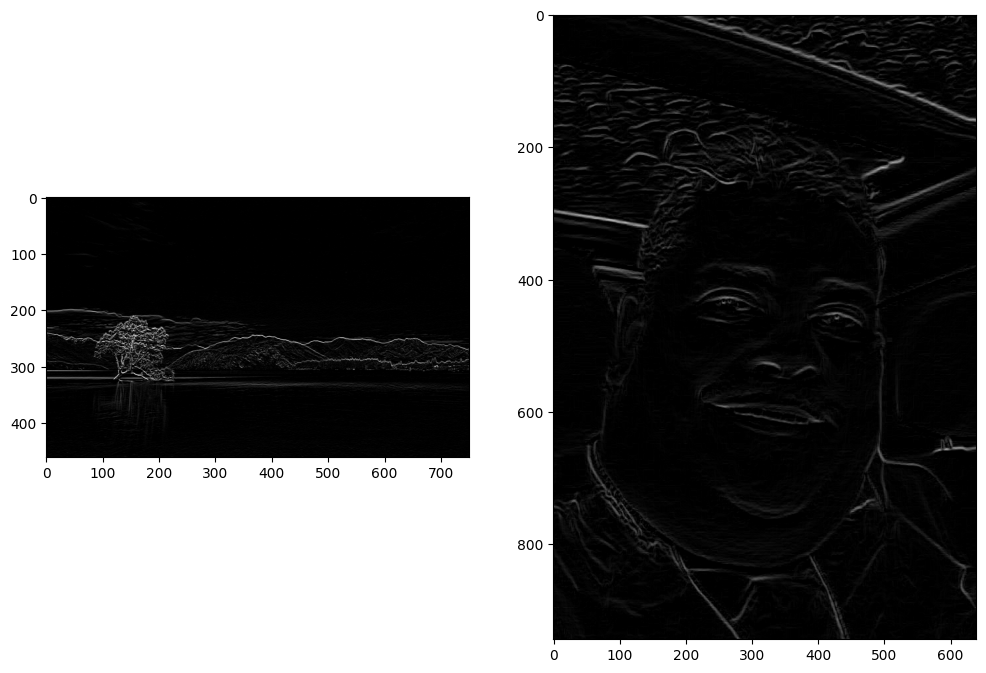

In [13]:
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

img1_roberts_x = cv2.filter2D(img_aluno1, -1, roberts_x)
img1_roberts_y = cv2.filter2D(img_aluno1, -1, roberts_y)
img1_roberts = cv2.addWeighted(img1_roberts_x, 2, img1_roberts_y, 2, 0)

img2_roberts_x = cv2.filter2D(img_aluno2, -1, roberts_x)
img2_roberts_y = cv2.filter2D(img_aluno2, -1, roberts_y)
img2_roberts = cv2.addWeighted(img2_roberts_x, 2, img2_roberts_y, 2, 0)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1_roberts, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_roberts, cv2.COLOR_BGR2RGB))

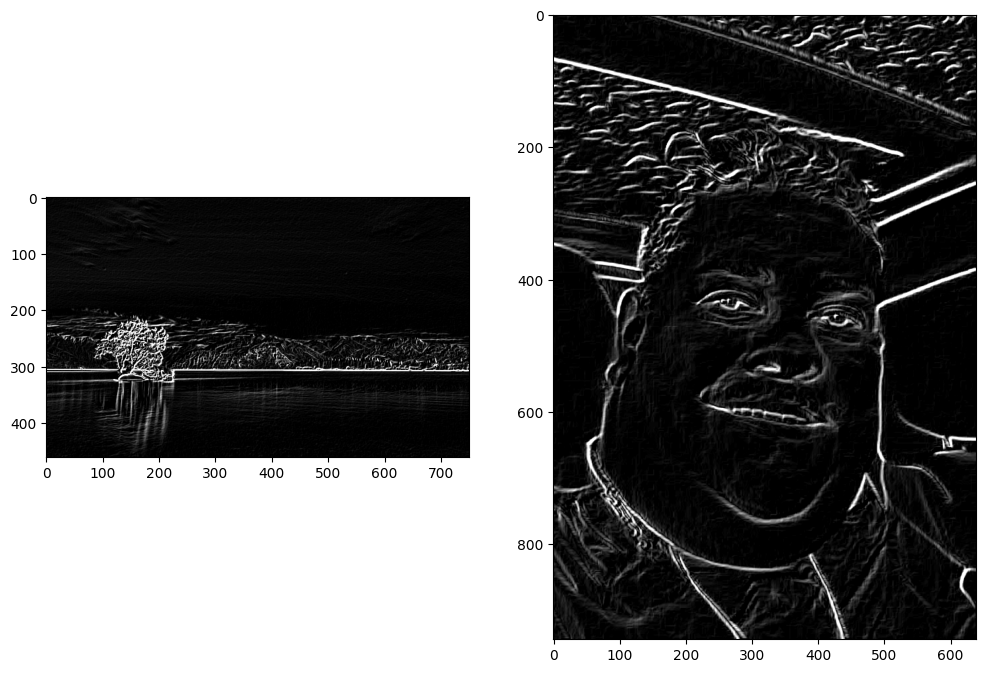

In [14]:
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)

img1_prewitt_x = cv2.filter2D(img_aluno1, -1, prewitt_x)
img1_prewitt_y = cv2.filter2D(img_aluno1, -1, prewitt_y)
img1_prewitt = cv2.addWeighted(img1_prewitt_x, 2, img1_prewitt_y, 2, 0)

img2_prewitt_x = cv2.filter2D(img_aluno2, -1, prewitt_x)
img2_prewitt_y = cv2.filter2D(img_aluno2, -1, prewitt_y)
img2_prewitt = cv2.addWeighted(img2_prewitt_x, 2, img2_prewitt_y, 2, 0)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1_prewitt, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_prewitt, cv2.COLOR_BGR2RGB))

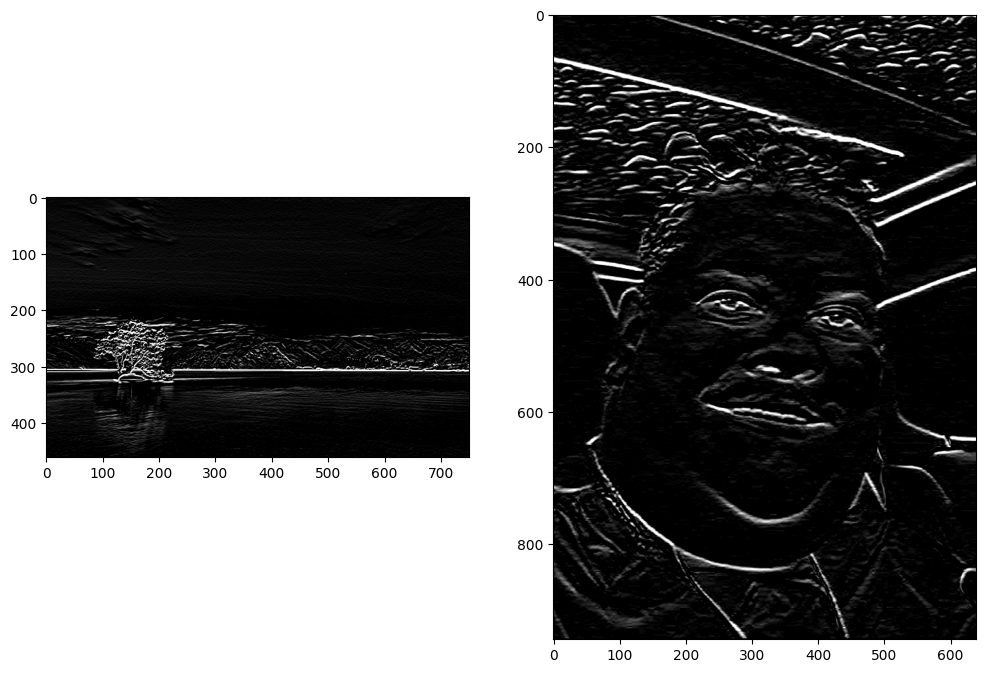

In [17]:
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, -1]], dtype=np.float32)

img1_sobel_x = cv2.filter2D(img_aluno1, -1, sobel_x)
img1_sobel_y = cv2.filter2D(img_aluno1, -1, sobel_y)
img1_sobel = cv2.addWeighted(img1_sobel_x, 2, img1_sobel_y, 2, 0)

img2_sobel_x = cv2.filter2D(img_aluno2, -1, sobel_x)
img2_sobel_y = cv2.filter2D(img_aluno2, -1, sobel_y)
img2_sobel = cv2.addWeighted(img2_sobel_x, 2, img2_sobel_y, 2, 0)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1_sobel, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2_sobel, cv2.COLOR_BGR2RGB))